In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Gadget

-------------------------------
M31
r90 =  5.579672
mstr =  [30310.627 30310.627 30310.627 ... 30310.627 30310.627 30310.627]
{30310.627: 648514}
...............................
mgas =  [60621.254 60621.254 60621.254 ... 30310.627 60621.254 60621.254]
{30310.627: 119250, 60621.254: 695864}
...............................
mdrk =  [287443.34 287443.34 287443.34 ... 287443.34 287443.34 287443.34]
{287443.34: 1834711}
...............................


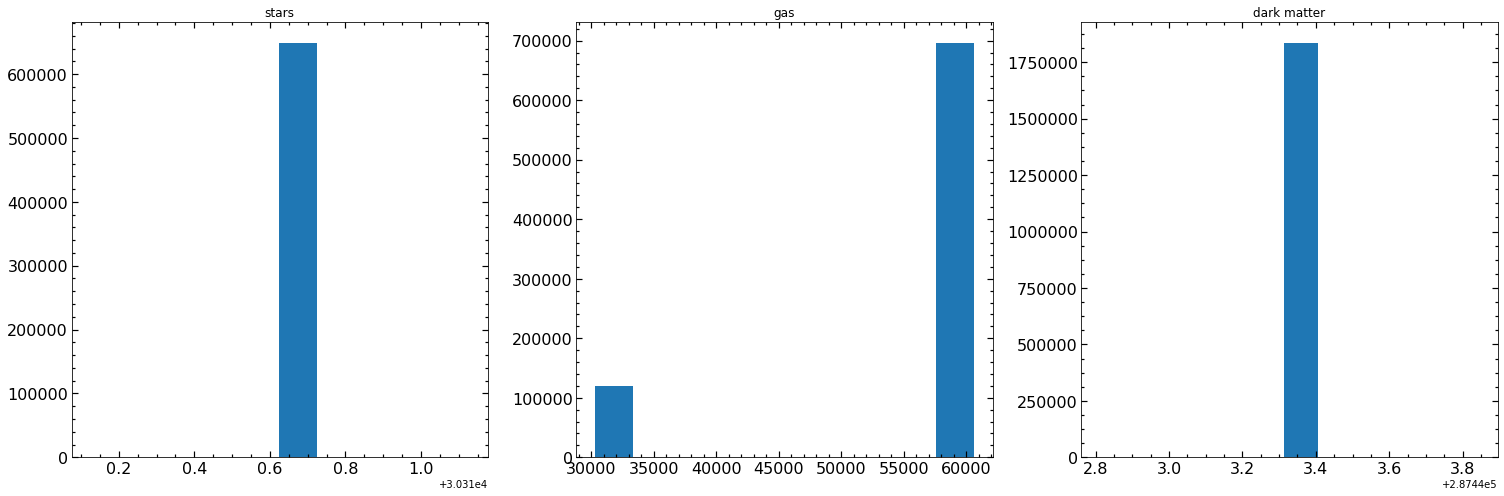

-------------------------------
MW
r90 =  6.1129704
mstr =  [30310.627 30310.627 30310.627 ... 30310.627 30310.627 30310.627]
{30310.627: 531584}
...............................
mgas =  [30310.627 30310.627 30310.627 ... 30310.627 60621.254 30310.627]
{30310.627: 65992, 60621.254: 291710}
...............................
mdrk =  [287443.34 287443.34 287443.34 ... 287443.34 287443.34 287443.34]
{287443.34: 1474072}
...............................


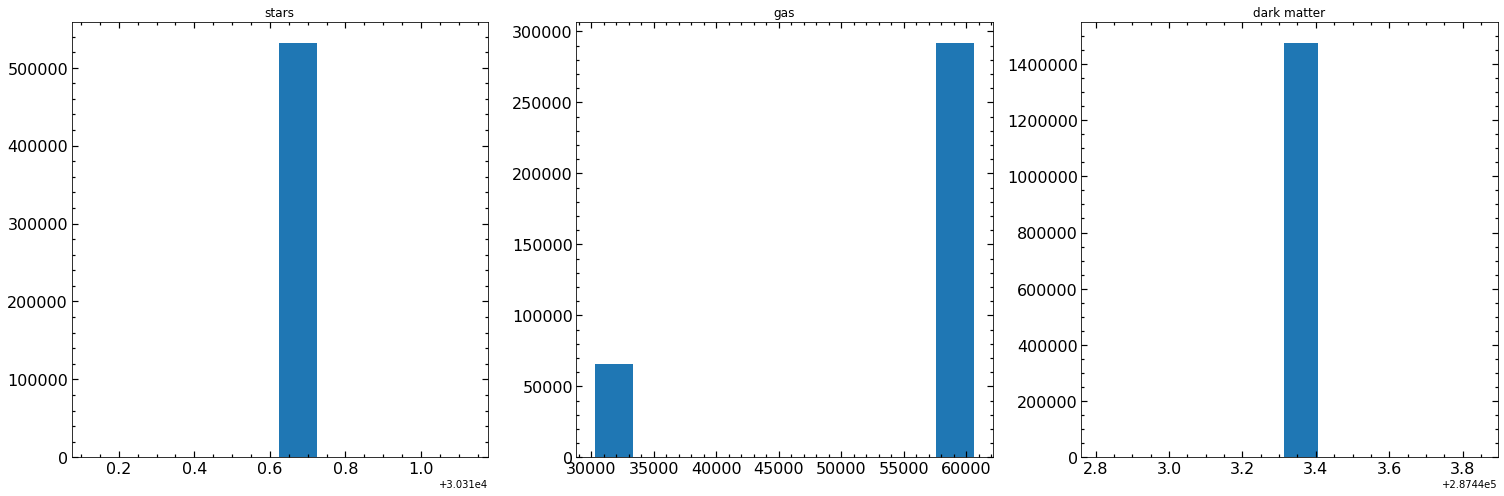

-------------------------------
M33
r90 =  8.041049
mstr =  [30310.627 30310.627 30310.627 ... 30310.627 30310.627 30310.627]
{30310.627: 290127}
...............................
mgas =  [60621.254 60621.254 60621.254 ... 60621.254 60621.254 60621.254]
{30310.627: 41507, 60621.254: 237035}
...............................
mdrk =  [287443.34 287443.34 287443.34 ... 287443.34 287443.34 287443.34]
{287443.34: 740659}
...............................


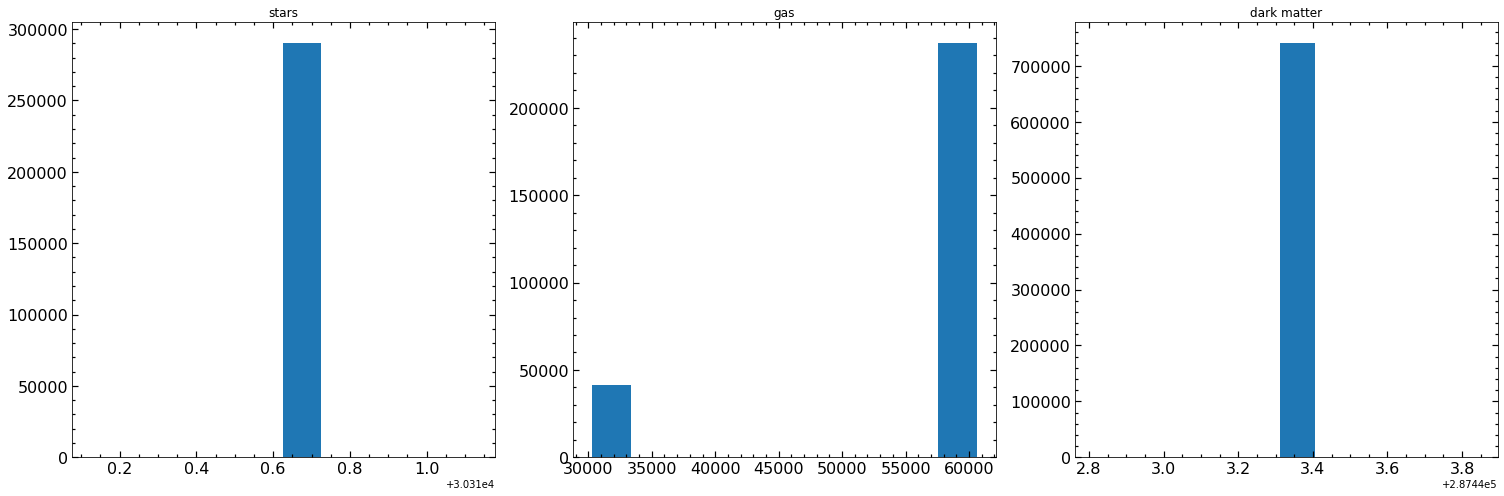

In [45]:
import h5py
# path = '/home/ornela/SimCLUES/'

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')

h=0.73005
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,3):
        print '-------------------------------'
        print str('%s'%vector2[i])
        
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value
        
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value
        
        xstr = (pstr[:,0]-cm[0])*aexp[0]/h
        ystr = (pstr[:,1]-cm[1])*aexp[0]/h
        zstr = (pstr[:,2]-cm[2])*aexp[0]/h
        rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[0]/h
        ygas = (pgas[:,1]-cm[1])*aexp[0]/h
        zgas = (pgas[:,2]-cm[2])*aexp[0]/h
        rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[0]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[0]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[0]/h
        rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
        
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[0]/h
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        Mgal_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
        razon = Mgal_str/M_gal
        noventa,= np.where(razon < 0.75)
        r90 = r_sort[noventa][-1]
        
        print 'r90 = ', r90
        
        limit_str   = np.where(rstr<r200)
        print 'mstr = ', mstr[limit_str]*1e10
        
        unique, counts = numpy.unique(mstr[limit_str]*1e10, return_counts=True)
        print dict(zip(unique, counts))
        print '...............................'
        
        limit_gas   = np.where(rgas<r200)
        print 'mgas = ', mgas[limit_gas]*1e10
        
        unique, counts = numpy.unique(mgas[limit_gas]*1e10, return_counts=True)
        print dict(zip(unique, counts))
        print '...............................'
        
        limit_drk   = np.where(rdrk<r200)
        print 'mdrk = ', mdrk[limit_drk]*1e10
        
        unique, counts = numpy.unique(mdrk[limit_drk]*1e10, return_counts=True)
        print dict(zip(unique, counts))
        print '...............................'

        

        
        fig, ax1 = plt.subplots(1, 3, figsize=(21, 7), tight_layout=True)

        #-------------------------
        ax1[0].hist(mstr[limit_str]*1e10)

        ax1[0].minorticks_on()
        ax1[0].tick_params(labelsize=16)
        ax1[0].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
        ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
        ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
        ax1[0].set_title('stars')
        #------------- ------------
        ax1[1].hist(mgas[limit_gas]*1e10) 

        ax1[1].minorticks_on()
        ax1[1].tick_params(labelsize=16)
        ax1[1].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
        ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
        ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
        ax1[1].set_title('gas')

        #------------------------
        ax1[2].hist(mdrk[limit_drk]*1e10)

        ax1[2].minorticks_on()
        ax1[2].tick_params(labelsize=16)
        ax1[2].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
        ax1[2].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
        ax1[2].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
        ax1[2].set_title('dark matter')

        plt.show()
        

## Gasoline

-------------------------------
M31
0.730047845568037
r90 =  3.224475
mstr =  [14348.55  14348.55  14348.55  ... 20191.723 20191.723 20191.723] mediana =  14535.461
mgas =  [62225.227 60647.387 60625.45  ... 60625.45  60625.45  60625.45 ] mediana =  60625.504
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


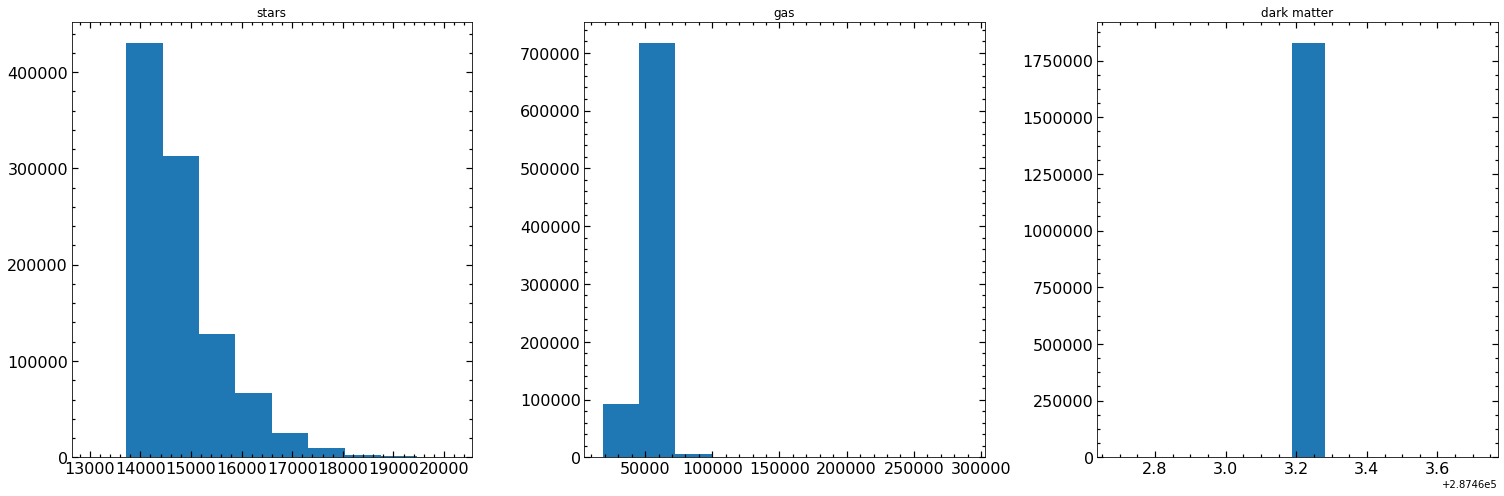

-------------------------------
MW
0.730047845568037
r90 =  5.702073
mstr =  [14348.555 14348.555 14348.555 ... 20191.723 20191.723 20191.723] mediana =  14349.125
mgas =  [60625.45 60625.45 60625.45 ... 60625.45 60625.45 60625.45] mediana =  60625.477
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


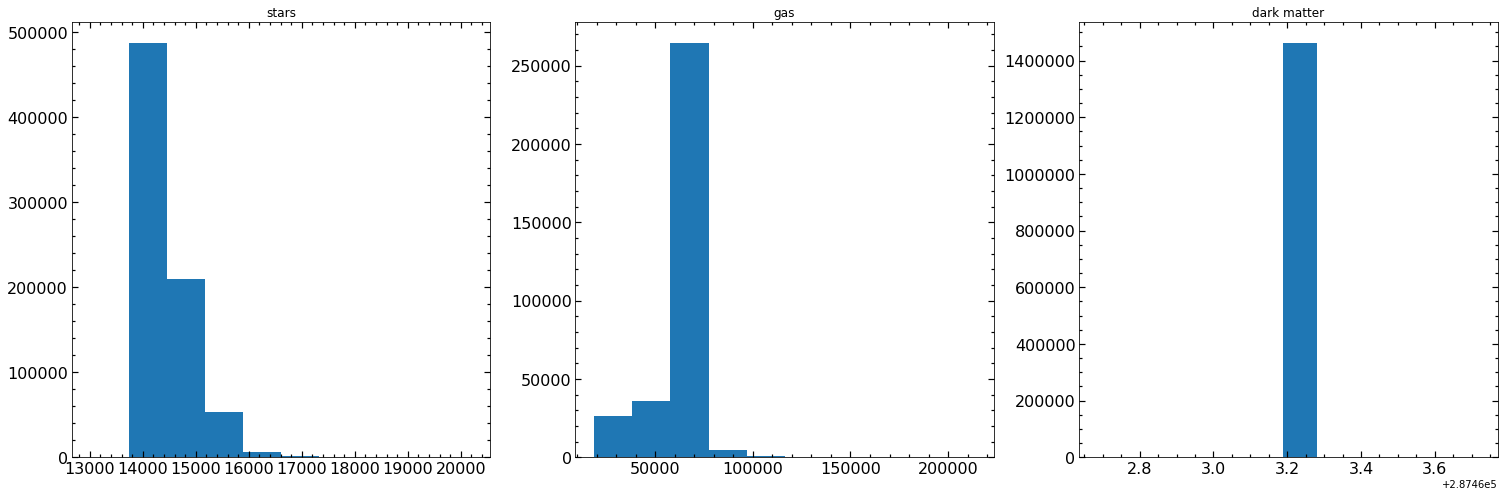

-------------------------------
M33
0.730047845568037
r90 =  6.122595
mstr =  [14348.594 14348.594 14348.594 ... 20191.723 20191.723 20191.723] mediana =  14348.204
mgas =  [60625.45  60625.45  60625.45  ... 60625.45  60625.45  60625.453] mediana =  60630.867
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


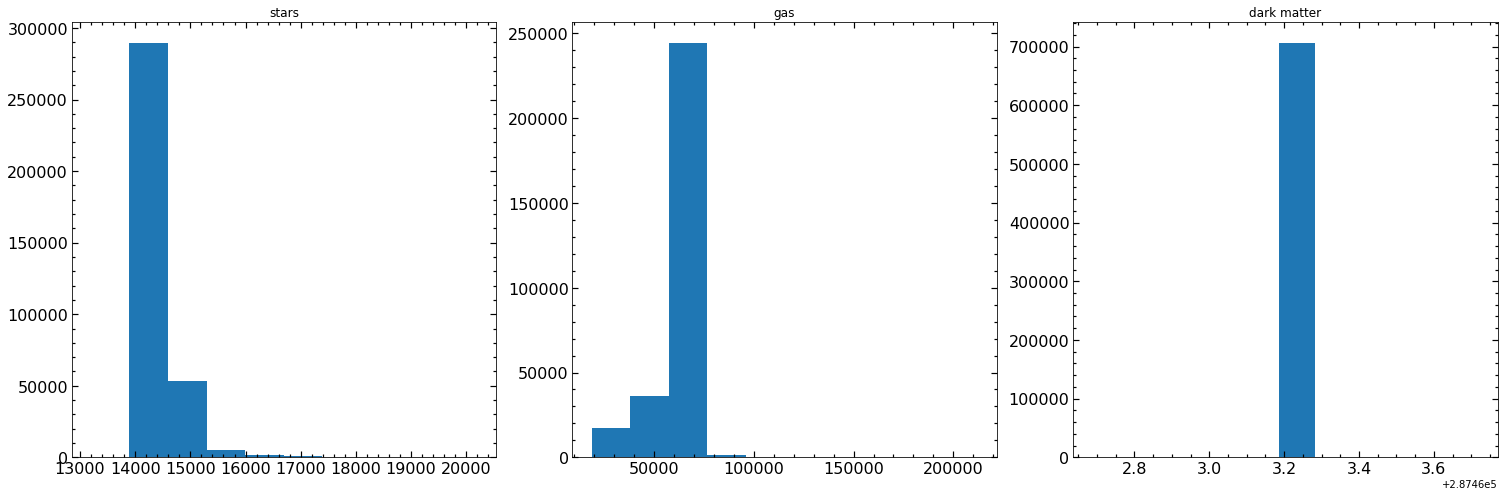

In [46]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')


snap = h5py.File(path+'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    print '-------------------------------'
    print str('%s'%vector2[i])
    
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
    
    print h

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
    
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    Mgal_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mgal_str[-1]
    razon = Mgal_str/M_gal
    noventa,= np.where(razon < 0.75)
    r90 = r_sort[noventa][-1]

    print 'r90 = ', r90

#------------------------------------------------
    limit_str   = np.where(rstr<r200)
    print 'mstr = ', mstr[limit_str], 'mediana = ', np.median( mstr[limit_str])

#     unique, counts = numpy.unique(mstr*1e-10, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'

    limit_gas   = np.where(rgas<r200)
    print 'mgas = ', mgas[limit_gas], 'mediana = ', np.median( mgas[limit_gas])

#     unique, counts = numpy.unique(mgas, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'

    limit_drk   = np.where(rdrk<r200)
    print 'mdrk = ', mdrk[limit_drk], 'mediana = ', np.median( mdrk[limit_drk])

#     unique, counts = numpy.unique(mdrk, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'



    fig, ax1 = plt.subplots(1, 3, figsize=(21, 7), tight_layout=True)

    #-------------------------
    ax1[0].hist(mstr[limit_str])

    ax1[0].minorticks_on()
    ax1[0].tick_params(labelsize=16)
    ax1[0].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
    ax1[0].set_title('stars')
    #------------- ------------
    ax1[1].hist(mgas[limit_gas]) 

    ax1[1].minorticks_on()
    ax1[1].tick_params(labelsize=16)
    ax1[1].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
    ax1[1].set_title('gas')

    #------------------------
    ax1[2].hist(mdrk[limit_drk])

    ax1[2].minorticks_on()
    ax1[2].tick_params(labelsize=16)
    ax1[2].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax1[2].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax1[2].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
    ax1[2].set_title('dark matter')

    plt.show()

In [11]:
unique, counts = numpy.unique(mgas[limit_gas], return_counts=True)
dict(zip(unique, counts))

{22400.5: 1,
 22816.5: 1,
 61923.746: 1,
 61948.254: 1,
 61588.867: 1,
 185582.14: 1,
 64202.98: 1,
 60997.777: 1,
 77986.06: 1,
 22732.451: 1,
 53047.207: 1,
 62558.285: 1,
 70849.78: 1,
 60650.438: 1,
 42090.54: 1,
 24891.896: 1,
 51331.047: 1,
 61583.3: 1,
 61904.246: 1,
 24119.21: 1,
 63643.555: 1,
 60909.473: 1,
 61120.316: 1,
 40873.3: 1,
 65943.14: 1,
 60632.824: 4,
 62181.08: 2,
 61681.332: 1,
 61181.586: 1,
 60681.84: 1,
 62230.094: 1,
 41762.348: 2,
 63278.6: 1,
 61279.617: 1,
 21712.502: 1,
 60628.594: 11,
 24283.197: 1,
 44993.65: 1,
 60847.777: 1,
 70226.69: 1,
 65022.918: 1,
 75796.34: 1,
 60951.426: 1,
 61146.664: 1,
 63681.074: 1,
 50211.68: 1,
 93302.375: 1,
 62024.44: 1,
 61385.773: 1,
 61024.95: 1,
 61549.203: 1,
 42646.695: 1,
 64119.44: 1,
 65874.945: 1,
 22875.863: 1,
 62146.98: 1,
 62671.234: 1,
 61659.49: 1,
 42215.742: 1,
 32760.504: 1,
 65162.668: 1,
 69748.47: 1,
 38656.25: 1,
 60684.504: 1,
 60885.71: 1,
 60925.562: 1,
 61860.84: 1,
 61757.52: 1,
 86450.96: 

## Gadget

-------------------------------
M31
mgas =  [60621.254 60621.254 60621.254 60621.254 60621.254 60621.254 60621.254
 60621.254] 8
{60621.254: 8}
...............................
mdrk =  [287443.34 287443.34 287443.34 287443.34 287443.34 287443.34] 6
{287443.34: 6}
...............................


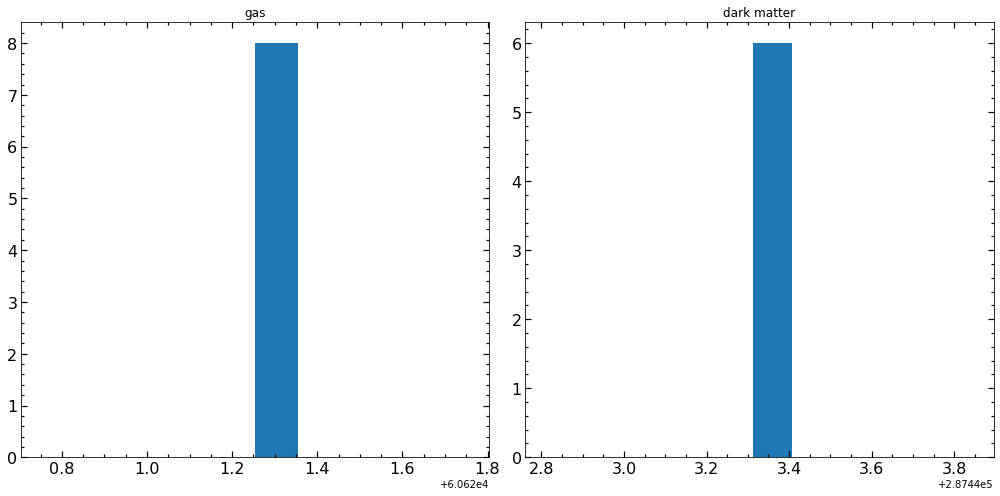

-------------------------------
MW
mgas =  [] 0
{}
...............................
mdrk =  [] 0
{}
...............................


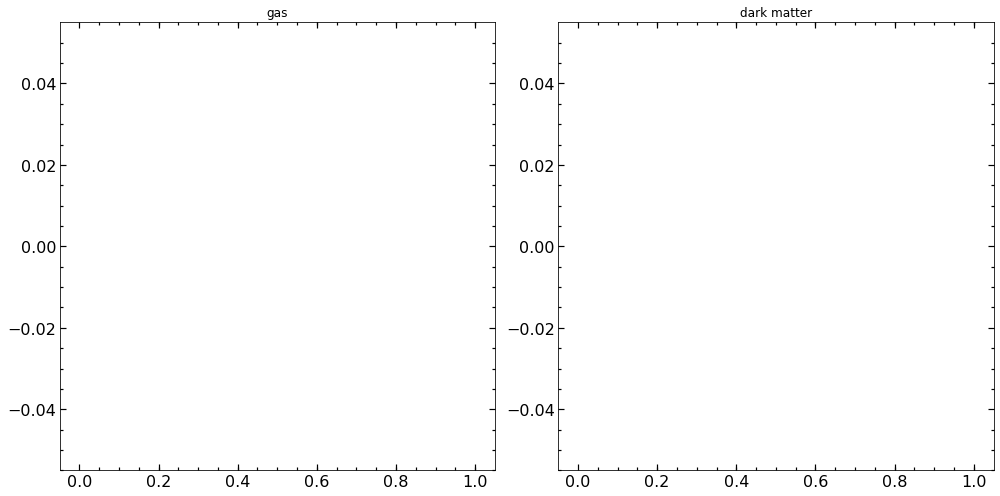

-------------------------------
M33
mgas =  [60621.254 60621.254 60621.254 60621.254 60621.254 60621.254 60621.254
 60621.254] 8
{60621.254: 8}
...............................
mdrk =  [287443.34 287443.34 287443.34 287443.34 287443.34 287443.34 287443.34] 7
{287443.34: 7}
...............................


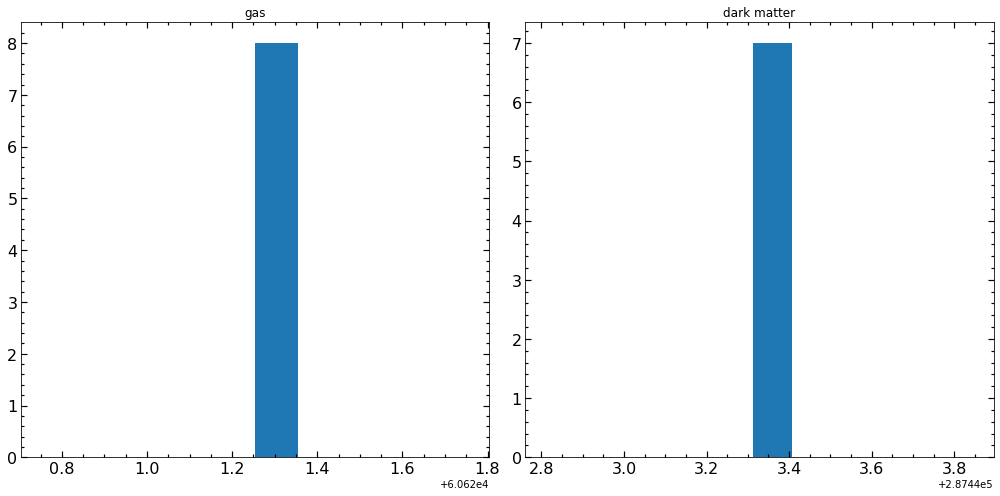

In [47]:
import h5py
# path = '/home/ornela/SimCLUES/'

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')

h=0.73005
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(0,1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,3):
        print '-------------------------------'
        print str('%s'%vector2[i])
        
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value
        
#         pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
#         mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value
        
#         xstr = (pstr[:,0]-cm[0])*aexp[0]/h
#         ystr = (pstr[:,1]-cm[1])*aexp[0]/h
#         zstr = (pstr[:,2]-cm[2])*aexp[0]/h
#         rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
        
#         mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[0]/h
        
        
#         limit_str   = np.where(rstr<r200)
#         print 'mstr = ', mstr[limit_str]*1e10
        
#         unique, counts = numpy.unique(mstr[limit_str]*1e10, return_counts=True)
#         print dict(zip(unique, counts))
#         print '...............................'
        
        limit_gas   = np.where(rgas<r200)
        print 'mgas = ', mgas[limit_gas]*1e10, len(mgas[limit_gas])
        
        unique, counts = numpy.unique(mgas[limit_gas]*1e10, return_counts=True)
        print dict(zip(unique, counts))
        print '...............................'
        
        limit_drk   = np.where(rdrk<r200)
        print 'mdrk = ', mdrk[limit_drk]*1e10 , len(mdrk[limit_drk])
        
        unique, counts = numpy.unique(mdrk[limit_drk]*1e10, return_counts=True)
        print dict(zip(unique, counts))
        print '...............................'

        fig, ax1 = plt.subplots(1, 2, figsize=(14, 7), tight_layout=True)
        #------------- ------------
        ax1[0].hist(mgas[limit_gas]*1e10) 

        ax1[0].minorticks_on()
        ax1[0].tick_params(labelsize=16)
        ax1[0].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
        ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
        ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
        ax1[0].set_title('gas')

        #------------------------
        mdrk = mdrk[limit_drk]*1e10
        ax1[1].hist(mdrk)
        ax1[1].minorticks_on()
        ax1[1].tick_params(labelsize=16)
        ax1[1].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
        ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
        ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
        ax1[1].set_title('dark matter')

        plt.show()
        

## Gasoline

-------------------------------
M31
mgas =  [60625.45 60625.45 60625.45 ... 60625.45 60625.45 60625.45] mediana =  60625.45
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


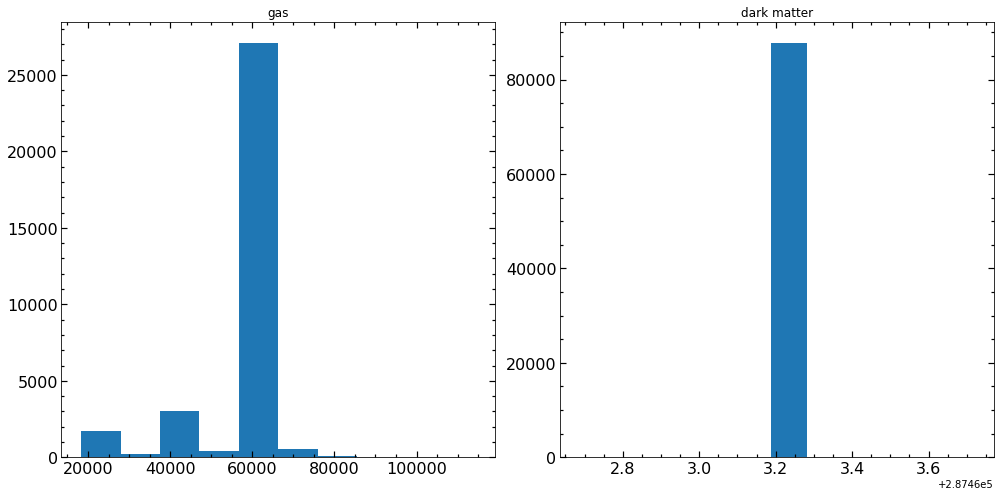

-------------------------------
MW
mgas =  [60625.45 60625.45 60625.45 ... 60625.45 60625.45 60625.45] mediana =  60625.45
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


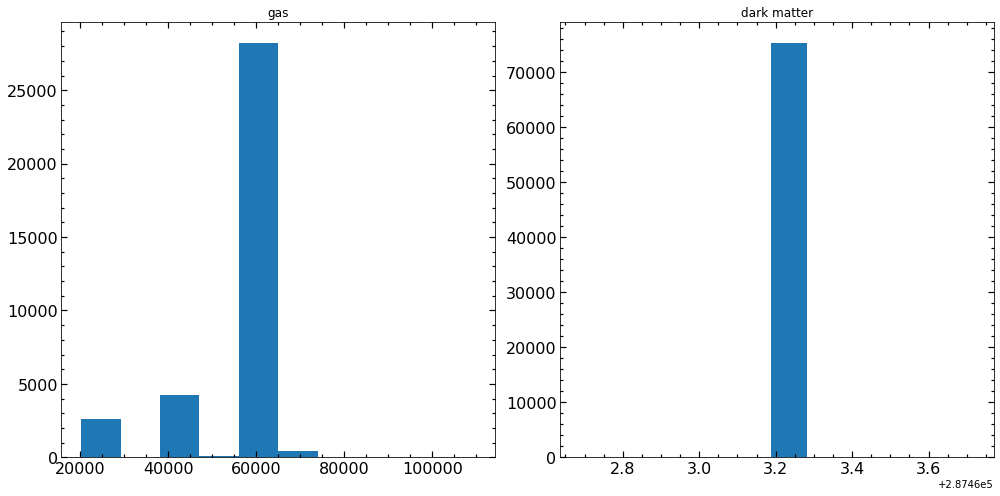

-------------------------------
M33
mgas =  [60625.45 60625.45 60625.45 ... 60625.45 60625.45 60625.45] mediana =  60625.45
mdrk =  [287463.22 287463.22 287463.22 ... 287463.22 287463.22 287463.22] mediana =  287463.22


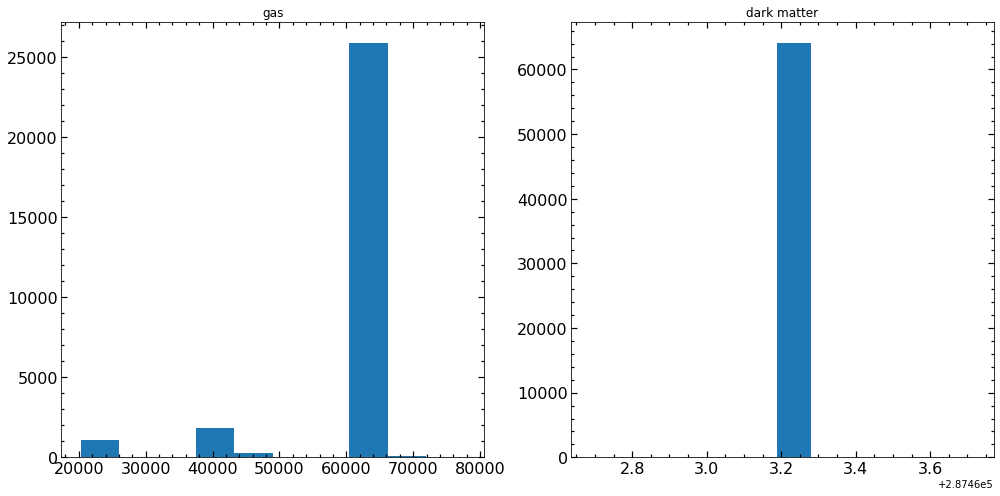

In [44]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')


snap = h5py.File(path+'Gasoline/outputs2/snap_0112.h5py', 'r')

for i in range(0,3):
    print '-------------------------------'
    print str('%s'%vector2[i])
    
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value

#     pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
#     mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
#     xstr = (pstr[:,0]-cm[0]) #*aexp
#     ystr = (pstr[:,1]-cm[1])
#     zstr = (pstr[:,2]-cm[2])
#     rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
#     limit_str   = np.where(rstr<r200)
#     print 'mstr = ', mstr[limit_str], 'media = ', np.median( mstr[limit_str])

#     unique, counts = numpy.unique(mstr*1e-10, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'

    limit_gas   = np.where(rgas<r200)
    print 'mgas = ', mgas[limit_gas], 'mediana = ', np.median( mgas[limit_gas])

#     unique, counts = numpy.unique(mgas, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'

    limit_drk   = np.where(rdrk<r200)
    print 'mdrk = ', mdrk[limit_drk], 'mediana = ', np.median( mdrk[limit_drk])

#     unique, counts = numpy.unique(mdrk, return_counts=True)
#     print dict(zip(unique, counts))
#     print '...............................'



    fig, ax1 = plt.subplots(1, 2, figsize=(14, 7), tight_layout=True)

    #------------- ------------
    ax1[0].hist(mgas[limit_gas]) 

    ax1[0].minorticks_on()
    ax1[0].tick_params(labelsize=16)
    ax1[0].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax1[0].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
    ax1[0].set_title('gas')

    #------------------------
    ax1[1].hist(mdrk[limit_drk])

    ax1[1].minorticks_on()
    ax1[1].tick_params(labelsize=16)
    ax1[1].tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax1[1].tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
    ax1[1].set_title('dark matter')

    plt.show()